In [139]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3
import re
import math
from v_finite_polygons import voronoi_finite_polygons_2d
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon, Patch
import matplotlib.image as mpimg
from matplotlib.ticker import ScalarFormatter

In [140]:
# ZoneAssignments = pd.read_csv('./dataInfo/ZoneAssignments.csv')
# key = list(ZoneAssignments.keys())[0]
# numZones = len(set(ZoneAssignments[key]))
# AutoZoneAssignments = pd.read_csv('./dataInfo/AutoZoneAssignments.csv')
# key = list(AutoZoneAssignments.keys())[0]
# numZones = len(set(AutoZoneAssignments[key]))
allFiles = glob.glob("./interpolatedData/*/*.csv")
# avgData = glob.glob("./stretchedAvgData/*.csv")
# avgDataAuto = glob.glob("./stretchedAvgDataAuto/*.csv")
# expData = glob.glob("./stretchedExpirementData/*.csv")
# expDataAuto = glob.glob("./stretchedExpirementDataAuto/*.csv")
df = {}
for x in allFiles:
    name = '_'.join(x.split('\\')[1:]).split('.')[0]
    df[name] = pd.read_csv(x,parse_dates=[0])
mergedDataFiles = glob.glob('./mergedData/*.csv')
mergedData = {(route.split("Data_")[1].split(".")[0]):pd.read_csv(route,parse_dates=[0]) for route in mergedDataFiles}
# mergedData13 = pd.read_csv('./mergedData/mergedData_4_13_22.csv',parse_dates=[0])
# mergedData14 = pd.read_csv('./mergedData/mergedData_4_14_22.csv',parse_dates=[0])
# mergedData15 = pd.read_csv('./mergedData/mergedData_4_15_22.csv',parse_dates=[0])
# stAvgDf = {}
# for x in avgData:
#     name = x.split('\\')[1].split('.')[0]
#     stAvgDf[name] = pd.read_csv(x)
# stAvgDfAuto = {}
# for x in avgDataAuto:
#     name = x.split('\\')[1].split('.')[0]
#     stAvgDfAuto[name] = pd.read_csv(x)
# stExpDf = {}
# for x in expData:
#     name = x.split('\\')[1].split('.')[0]
#     stExpDf[name] = pd.read_csv(x)
# stExpDfAuto = {}
# for x in expDataAuto:
#     name = x.split('\\')[1].split('.')[0]
#     stExpDfAuto[name] = pd.read_csv(x)

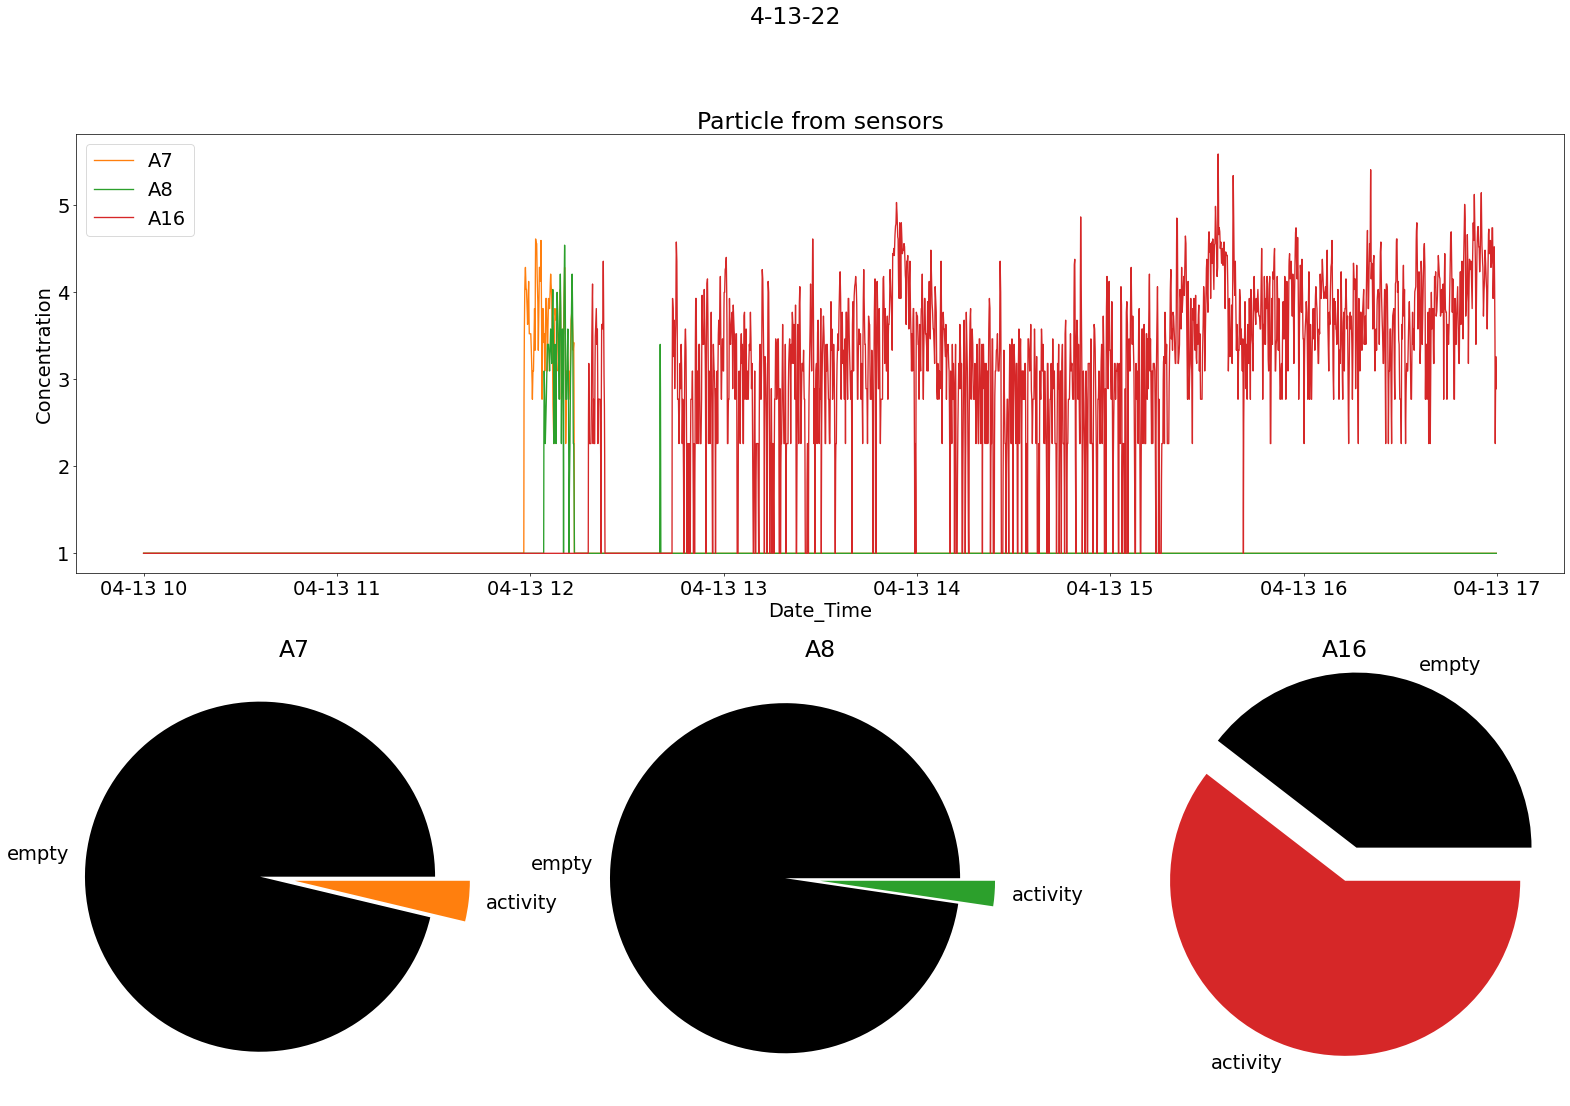

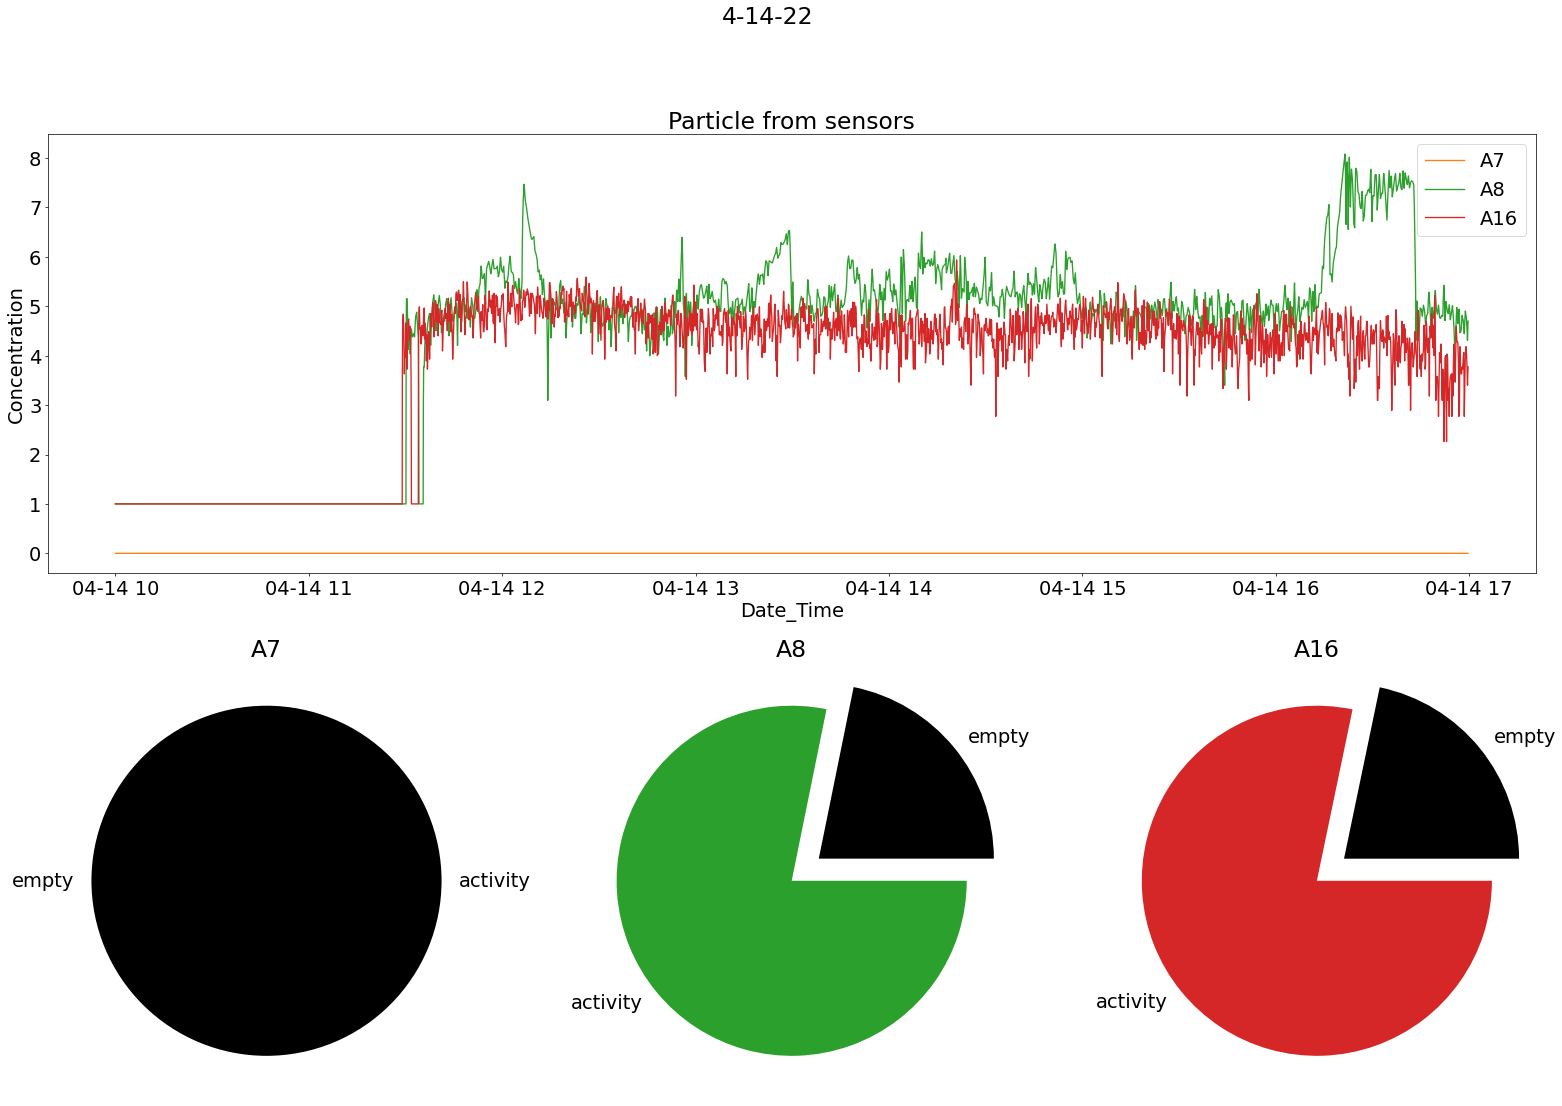

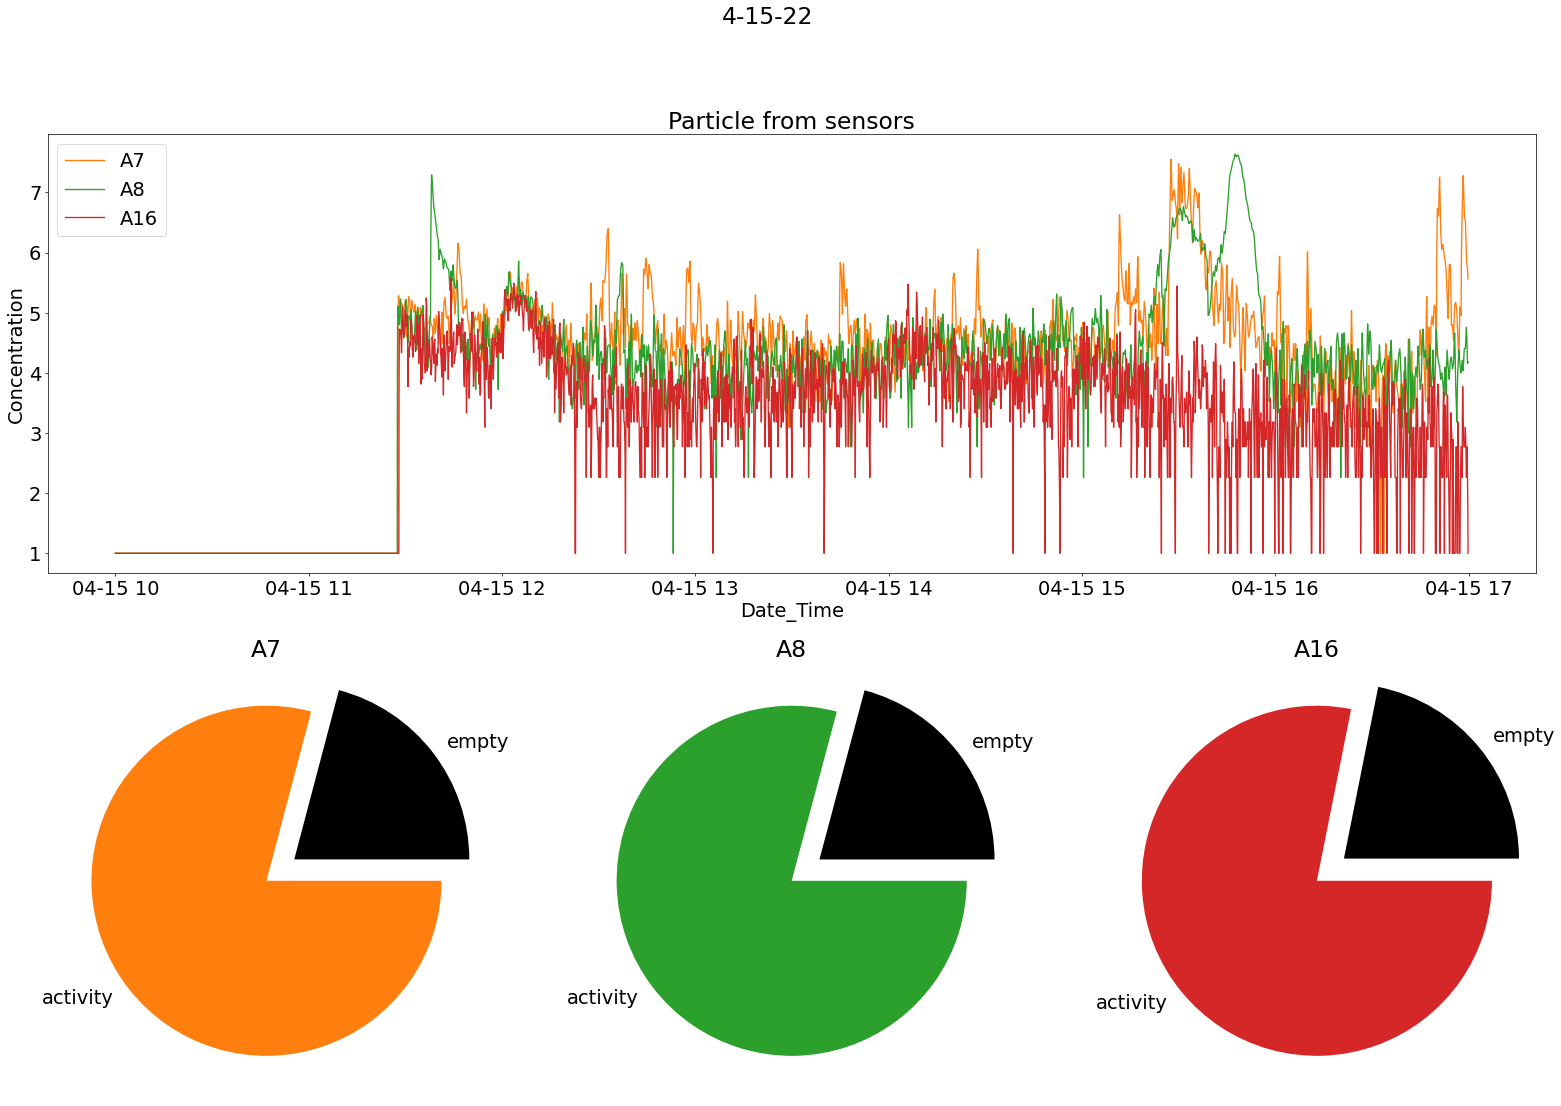

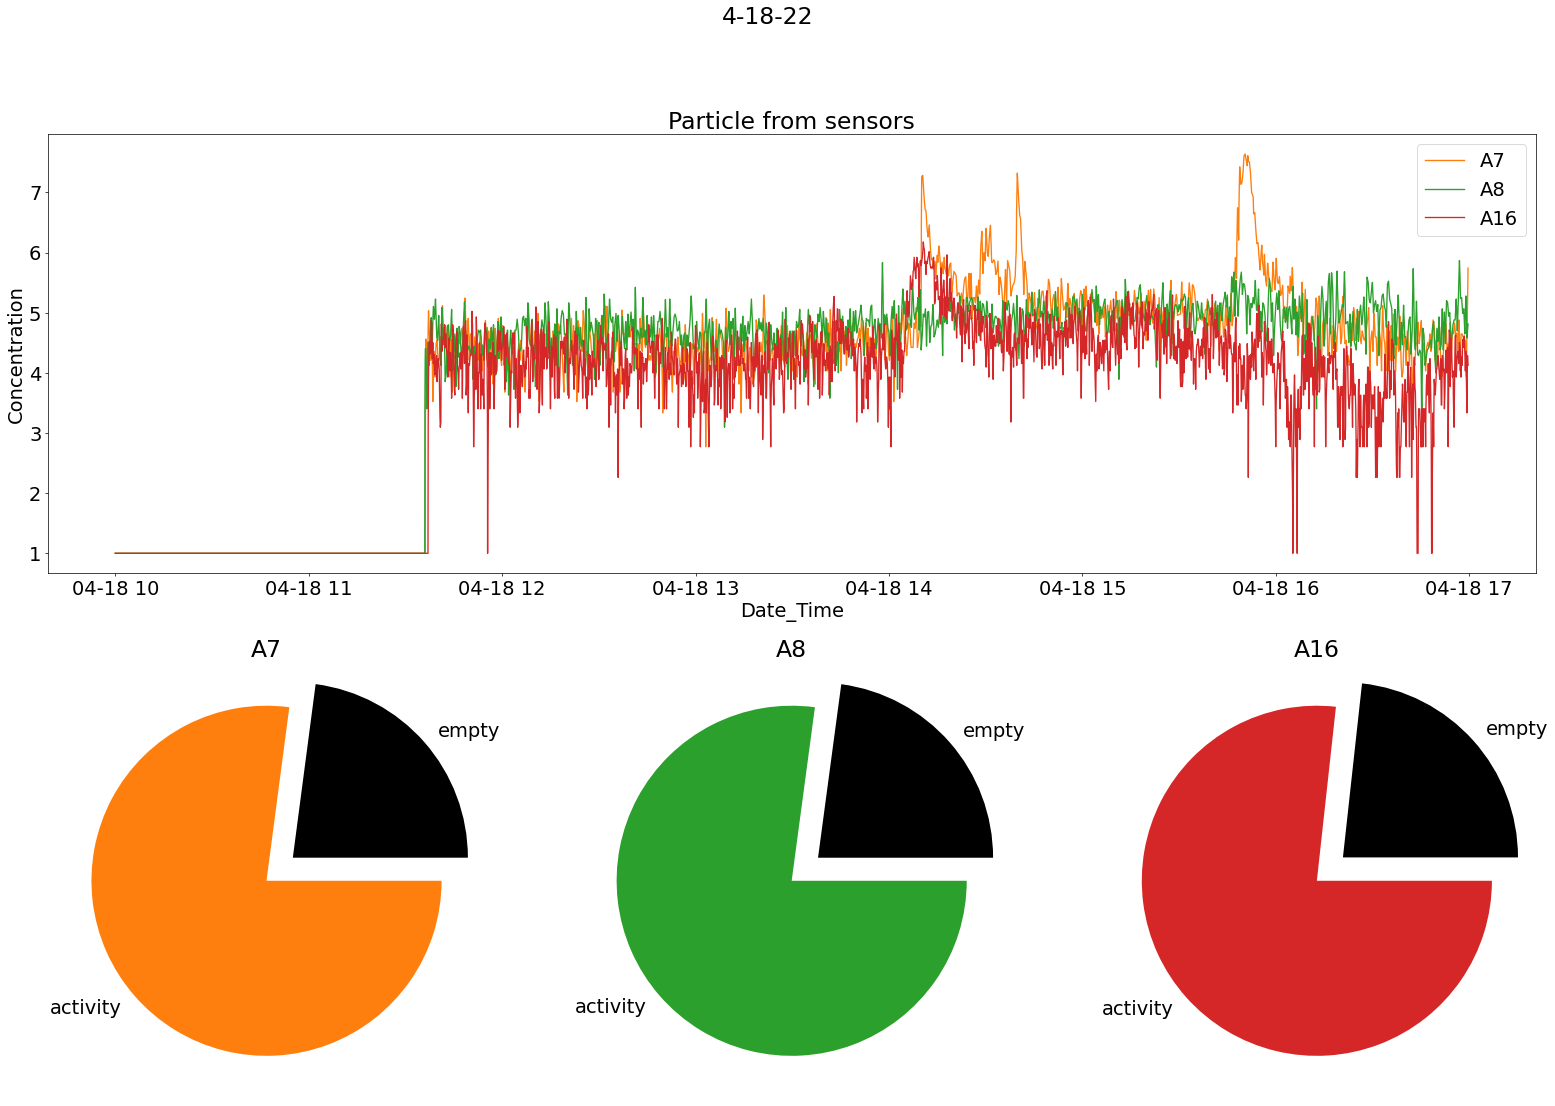

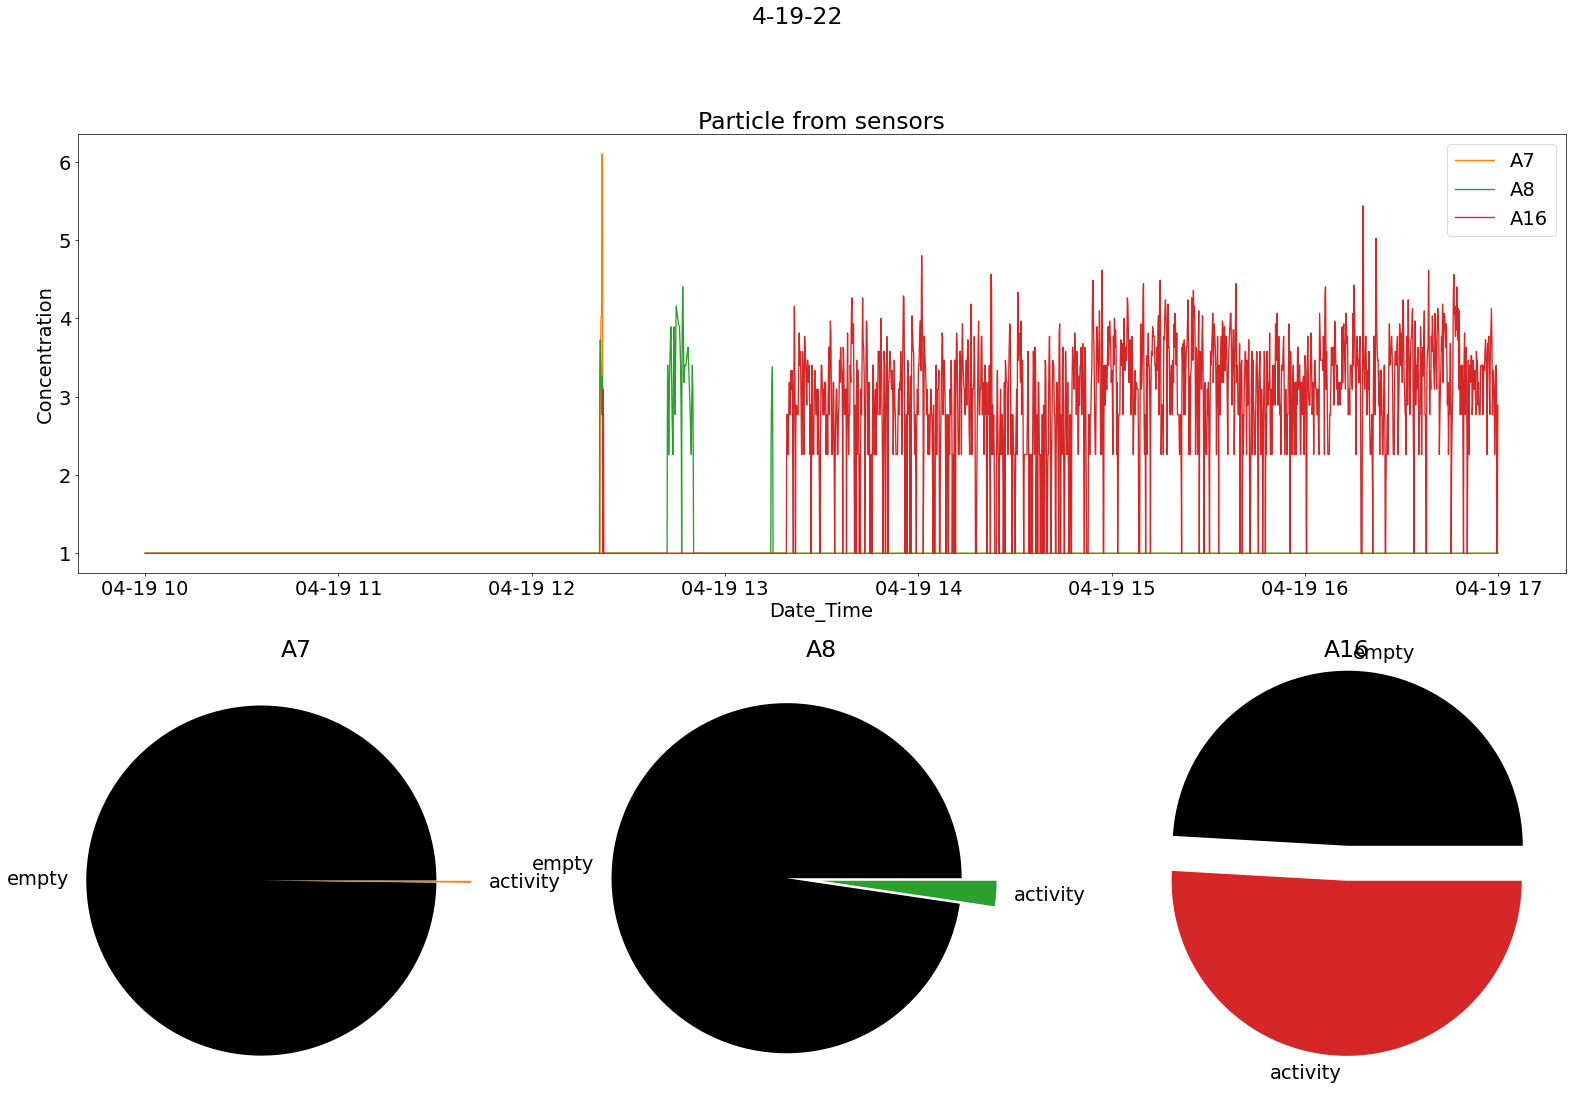

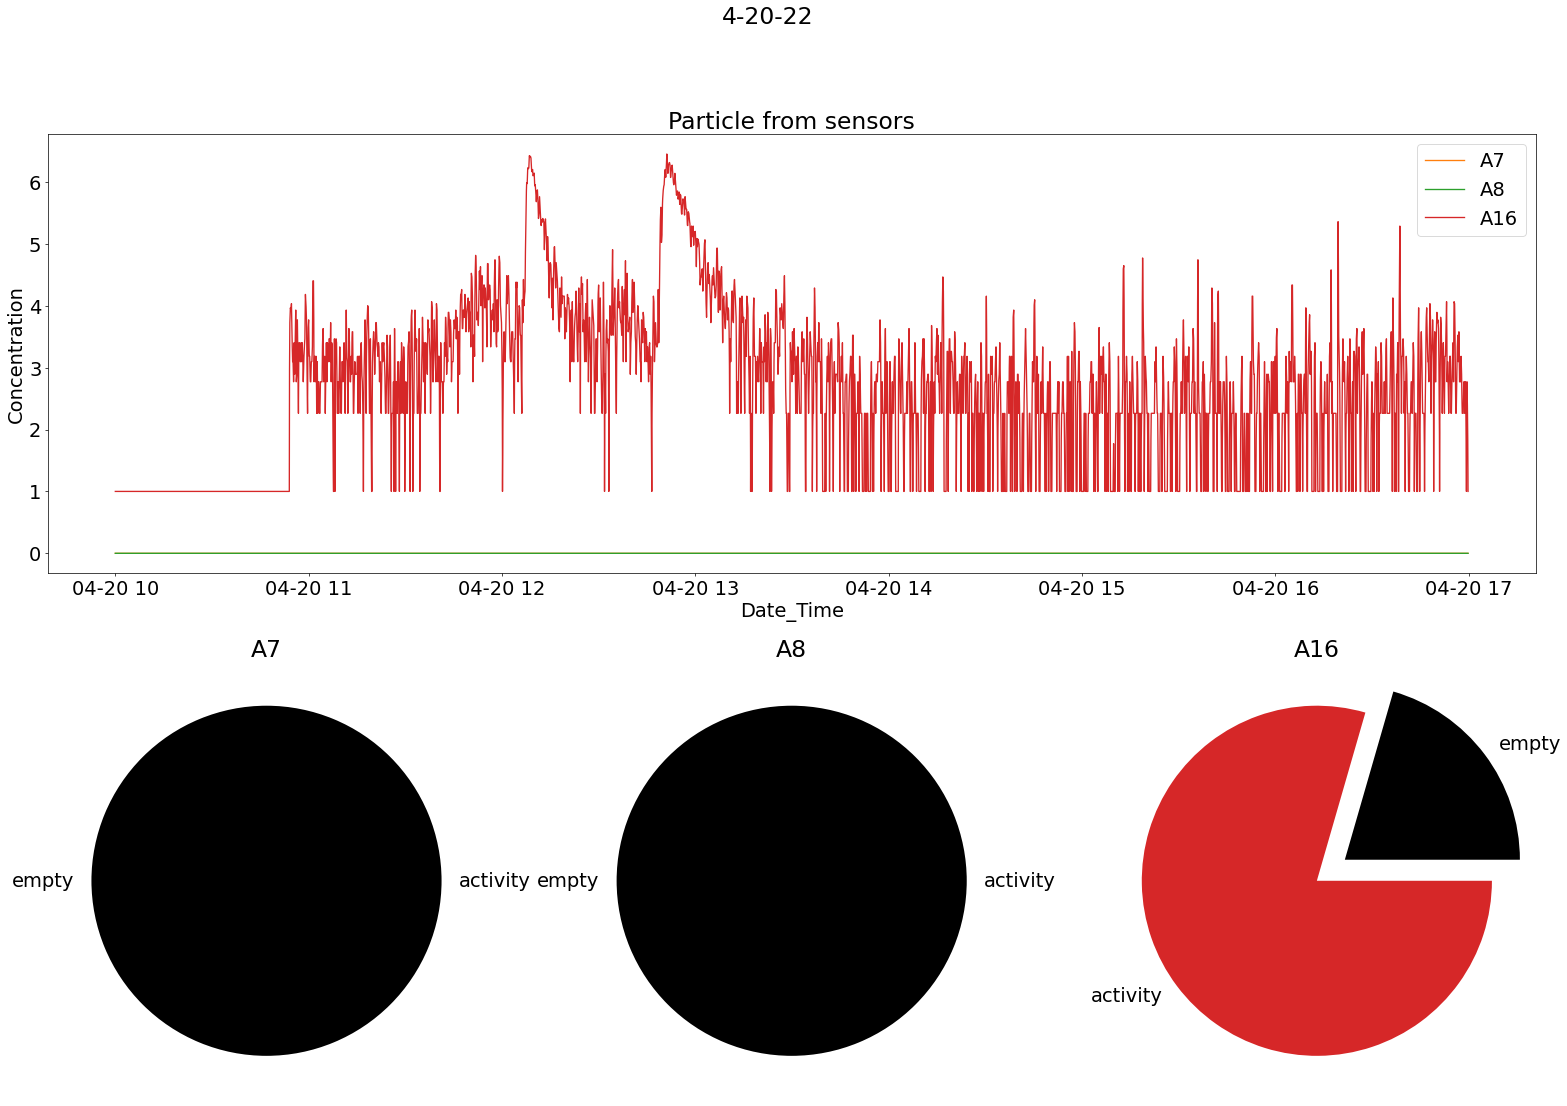

In [143]:
# print(mergedData)
for name, frame in mergedData.items():
    sensors = ['A7', 'A8', 'A16']
    i = 1
    fig = plt.figure(figsize=(30,20), dpi=64)
    ax1= fig.add_subplot(2,1,1)
    ax2= fig.add_subplot(2,3,4)
    ax3= fig.add_subplot(2,3,5)
    ax4= fig.add_subplot(2,3,6)
    ax = [ax1,ax2,ax3,ax4]

    for column in sensors:
        try:
            # ax.plot(frame['Date_Time'],np.log(frame["Average"]+3)/np.log(3),'--',color = "black",label = "Average")
            emptyPercent = round(sum([1 if i == 0 else 0 for i in frame[column]])/len(frame[column])*100,2)
            # plt.title(f"% of empty cells: {emptyPercent}%")
            ax[0].plot(frame['Date_Time'],np.log(frame[column]+3)/np.log(3),'-',color = color[i*2],label = f"{column}")# : {emptyPercent}% empty")
            # ax[0].plot(frame['Date_Time'],frame[column],'-',color = color[i*2],label = f"{column}")
            ax[i].pie([emptyPercent,100-emptyPercent],colors = ["black",color[i*2]],labels = ["empty","activity"], explode = [0.2,0])
            ax[i].set(title = column)
        except:
            ax[0].plot(frame['Date_Time'],[0]*len(frame),'-',color = color[i*2],label = f"{column}")# : 100% empty")
            ax[i].pie([100,0],colors = ["black",color[i*2]],labels = ["empty","activity"])
            ax[i].set(title = column)
        i += 1
    ax[0].legend()
    ax[0].set_xlabel(frame.columns[0])
    ax[0].set_ylabel('Concentration')
    # ax[0].set_ylim([0,100])
    plt.suptitle(f'{name.replace("_","-")}')
    ax[0].set(title= "Particle from sensors")
    plt.savefig(f"C:\\Users\\RobertRochlin\\Documents\\UW\\covidDataProject\\MEMachineShop\\Graphs, Images, and Animations\\activity_{name}.jpg")



In [115]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

color = tableau20

### All Sensors Plotted

In [ ]:
mergedData

In [ ]:

fig,sPlt=plt.subplots(18,sharex=False,sharey=False,figsize=(20,35))
# fig.delaxes(sPlt[1,1])
DataFrame = mergedData

for idx,sensor in enumerate(DataFrame.columns[1:19]):
    yData = (DataFrame[sensor])
    xData = [i for i in range(-60,len(yData)-60)]

    sPlt[idx].plot(xData,yData,color = color[idx],label = sensor)

    sPlt[idx].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[idx].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[idx].set(title=sensor,xlabel='Time',ylabel='Measured Particles')



for ax in sPlt:
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    # ax.legend(prop={'size':9})
    ax.set_ylim([1,5000])
    # ax.set_yscale("log")

    
    
plt.tight_layout()
plt.rcParams.update({'font.size':16})
mpld3.save_html(fig,'IndSensors.html')


### Zones Plotted Showing Sensor

In [ ]:
InteriorSensors

In [ ]:
img = mpimg.imread("./Graphs, Images, and Animations/ICU1.png")
imgplot = plt.imshow(img, aspect='auto', extent=(1,10,1,10), alpha=1, zorder=-1)

### Check the Spatial Zoning distribution

In [ ]:
if re.match('EE502',key):
    print('match')
else:
    print('no match')

In [ ]:
[key for key in stAvgDf[list(stAvgDf.keys())[0]] if re.match('S-',key)]

In [ ]:

# sensors = [key for key in stAvgDf[list(stAvgDf.keys())[0]] if re.match('S-',key)]
sensors = [key for key in InteriorSensors]

fig,sPlt = plt.subplots(3,figsize=(12,9*3))
auto = True
if auto:
    ZoneFrame = AutoZoneAssignments
else:
    ZoneFrame = ZoneAssignments
keys = list(ZoneFrame.keys())

for auto,ax in enumerate(sPlt):
    ax.set_ylim([-1,12])
    ax.set_xlim([-1,12])
    ax.plot([0,0],[0,10])
    ax.plot([10,10],[0,10])
    ax.plot([0,10],[0,0])
    ax.plot([0,10],[10,10])
    img = mpimg.imread("./Graphs, Images, and Animations/ICU1.png")
    imgplot = ax.imshow(img, aspect='auto', extent=(-1,12,-1,12), alpha=1, zorder=-1)
    for idx, sensor in enumerate(sensors):
        x = InteriorSensors[sensor][0]
        y = InteriorSensors[sensor][1]
        
        circle = plt.Circle((x,y),1,alpha = 0.25,color = color[ZoneFrame[keys[auto]][idx]*2])
        ax.add_patch(circle)
        ax.text(x,y,sensor,fontsize = 14, color = "black")

    for i in range(4):
        ax.plot(0,0,label='Zone '+str(i+1),color = color[i*2])
    ax.legend(loc='upper right')

# plt.savefig(f"C:\\Users\\RobertRochlin\\Documents\\UW\\covidDataProject\\finalImages\\HMC-Zones.jpg")

In [ ]:
# ZoneAssignments.keys()
ISC = InteriorSensors
# fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(10,10))
for iteration,key in enumerate(ZoneAssignments.keys()):
    x=[]
    y=[]
    points = []
    for idx,sensor in enumerate(InteriorSensors):
        points.append(ISC[sensor])
    vor = Voronoi(points)
    regions, vertices = voronoi_finite_polygons_2d(vor)
    polygons = []
    for reg in regions:
        polygon = vertices[reg]
        polygons.append(polygon)

    plt.figure(figsize=(5,5))
    if re.match('EE502',key):
        route = './Graphs, Images, and Animations/ICU1.png'
    else:
        route = './Graphs, Images, and Animations/ICU2.png'
    img = mpimg.imread(route)
    plt.imshow(img, aspect='auto', extent=(0,10,0,11), alpha=1, zorder=-1)
    ax = plt.subplot(111)

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    ax.axis("equal")

    # Set limits
    ax.set_xlim(0,10)
    ax.set_ylim(0,11)

    # Add polygons 
    for idx,poly in enumerate(polygons):
        colored_cell = Polygon(poly,linewidth=0.7, alpha=0.5,facecolor=color[ZoneAssignments[key][idx]*2],edgecolor="black")
        ax.add_patch(colored_cell)
    plt.title(key)
    # got lazy here and explicitly defined the zones
    legend_elements = [Patch(facecolor=color[1], edgecolor='black',label='Zone 1'),
                       Patch(facecolor=color[3], edgecolor='black',label='Zone 2'),
                       Patch(facecolor=color[5], edgecolor='black',label='Zone 3'),
                       Patch(facecolor=color[7], edgecolor='black',label='Zone 4'),]
    plt.legend(handles = legend_elements,bbox_to_anchor=(1.05, .9))
    plt.show()
    # voronoi_plot_2d(vor)
        # sPlt[iteration%2][0 if iteration < 2 else 1].plot(X,Y,'o',color = C,mew = 10)


    


In [ ]:
mergedData

In [ ]:
stAvgDf['ICU Room 2 Door Partially Open']

In [ ]:

fig,sPlt=plt.subplots(3,sharex=False,sharey=False,figsize=(20,15))
# fig.delaxes(sPlt[1,1])
DataFrame = mergedData

for idx,sensor in enumerate(DataFrame.columns[1:19]):
    if sensor in ['S-02','S-03','S-05']:
        continue
    if idx < 6:
        num = 0
    elif idx < 15:
        num = 1
    else:
        num = 2

    yData = DataFrame[sensor]
    xData = DataFrame["Date_Time"]

    sPlt[num].plot(xData,yData,color = color[idx],label = sensor)

for i in range(3):

    sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sensor = ['Zone 1','Zone 2','Zone 3']
    sPlt[i].set(title=sensor[i],xlabel='Time',ylabel='Measured Particles')
    
    # yData = DataFrame[DataFrame.keys()[21+i*2]]
    # xData = DataFrame["Date_Time"]
    # sPlt[i].plot(xData,yData,color = "Black",label = "Average",linewidth=2)
    # sPlt[i].grid(color='black', linestyle='--', linewidth=.1)



for ax in sPlt:
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    ax.legend(prop={'size':12})
    # ax.legend(loc="upper right")
    ax.set_ylim([100,10**5])
    ax.set_xlim([pd.Timestamp('4/20/2021 9:30'),pd.Timestamp('2021-04-20 14:00')])
    ax.set_yscale("log")

    
    
plt.tight_layout()
plt.rcParams.update({'font.size':16})


## Plots of Avg Zone reading with Avg sensor reading

In [ ]:
# stExpDf[key + ' Exp '+str(i)]#[sensors[idx]]
# numExps
# [i for i,s in enumerate(stExpDf.keys()) if key in s]
# stExpDf.keys()

In [ ]:
len(set(ZoneAssignments.iloc[:,1]))

In [ ]:
idx

In [ ]:
DataFrame.keys()

In [ ]:
idx

In [ ]:
ZoneAssignments

In [ ]:
DataFrame

In [ ]:
trails = list(stExpDf.keys())
expirements = list(stAvgDf.keys())
[i for i in trails if expirements[0] in i]



In [ ]:
ZoneAssignments

In [ ]:
import pickle
with open('4_20_Data.pickle', 'wb') as handle:
    pickle.dump(stAvgDf, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:

size = len(stAvgDf)
fig,sPlt=plt.subplots(3,2,sharex=False,sharey=False,figsize=(20,20))
#fig.suptitle("March 22nd Data",fontsize=30)
numZones = len(set(ZoneAssignments.iloc[:,1]))

zones = ['Zone '+str(i+1) for i in range(numZones)]
trials = list(stExpDf.keys())
zoneFrame = {}
for iteration,key in enumerate(stAvgDf):
    # fig.delaxes(sPlt[1,1])

    DataFrame = stAvgDf[key]
    sensors = [key for key in list(DataFrame.keys()) if re.match('S-',key)]
    numExps = len([i for i,s in enumerate(stExpDf.keys()) if key in s])
    zoneFrame[key] = {}
    # creates a zoneFrame, which is a dictionary that will store of the sensor data for each zone for individual sensor plots
    for zone in range(numZones):
        zoneFrame[key][zone] = pd.DataFrame()

    for idx,zone in enumerate(ZoneAssignments[key][:len(sensors)]):
        for i in range(numExps):
            # print(idx)
            yData = stExpDf[key + ' Exp '+str(i+1)][sensors[idx]]
            zoneFrame[key][zone][sensors[idx] + ' Exp ' + str(i)] = yData


    for idx in range(numZones):
        # sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
        # sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 

        for trial in [i for i in trials if key in i]:
            # print([0 if iteration < 1 else 1],[iteration%2])
            # print(trial,idx)
            yExpData = stExpDf[trial][zones[idx]]
            xExpData = [i for i in range(-60,len(yData)-60)]
            if (re.match('ICU Room 1 Door Partially Open',trial) and idx == 1):
                print('adjusted')
                xExpData = np.array(xExpData) + 10
            sPlt[0 if iteration < 2 else 1 if iteration < 4 else 2][iteration%2].plot(xExpData,yExpData,color = color[idx*2+1],linewidth=1)

        yData = DataFrame[zones[idx]]
        yError = np.var(zoneFrame[key][idx],axis = 1)**.5
        xData = [i for i in range(-60,len(yData)-60)]
        if (re.match('ICU Room 1 Door Partially Open',key) and idx == 1):
                print('adjusted')
                xData = np.array(xExpData) + 10

        # sPlt[iteration].errorbar(xData,yData,yerr=yError,ecolor = color[idx*2+1],color = color[idx*2],label = zones[idx],linewidth=4)

        sPlt[0 if iteration < 2 else 1 if iteration < 4 else 2][iteration%2].plot(xData,yData,color = color[idx*2],label = zones[idx],linewidth=4)

    sPlt[0 if iteration < 2 else 1 if iteration < 4 else 2][iteration%2].grid(color='black', linestyle='--', linewidth=.1)
    sPlt[0 if iteration < 2 else 1 if iteration < 4 else 2][iteration%2].set(title=key,xlabel='Seconds From Nebulization',ylabel='Measured Particles')


    for el in sPlt:
        for ax in el:
            ax.spines["top"].set_visible(False)   
            ax.spines["bottom"].set_visible(False)    
            ax.spines["right"].set_visible(False)    
            ax.spines["left"].set_visible(False) 
            ax.legend(prop={'size':12})
            # ax.legend(loc="upper right")
            ax.set_ylim([10**1.5,10**4.5])
            # ax.set_xlim([pd.Timestamp(startTime),pd.Timestamp(endTime)])
            ax.set_yscale("log")
            ax.yaxis.set_major_formatter(ScalarFormatter())
    # break
        
        
plt.tight_layout()
plt.rcParams.update({'font.size':16})
fig.delaxes(sPlt[2][1])
# plt.savefig(r"C:\Users\RobertRochlin\Documents\UW\covidDataProject\finalImages\Quad_4-20.png")
    # break
# mpld3.save_html(fig,'ZonedVariances.html')



In [ ]:
numZones = len(set(ZoneAssignments.iloc[:,1]))
numAutoZones = len(set(AutoZoneAssignments.iloc[:,1]))
for nameNum in range(len(stAvgDf.keys())):

    #Just going to plot OR 
    names = list(stAvgDf.keys())
    fig = plt.figure(figsize=(12,9))
    ax = fig.gca()
    name = names[nameNum]
    key = name.split(" Exp ")[0]



    # dFrame = stExpDf[name]
    dFrame = stAvgDf[key]

    for zone in range(numZones):
        yData = dFrame['Zone '+str(zone+1)]/100
        xData = np.array([i for i in range(-60,len(yData)-60)])
        for trail in [i for i in trails if key in i]:
            # print([0 if iteration < 1 else 1],[iteration%2])
            # print([200 if trail =="OR 12 Unblocked Exp 3" else 0][0])
            try:
                yExpData = stExpDf[trail]['Zone '+str(zone+1)]/100
                xExpData = np.array([i for i in range(-60,len(yData)-60)])#+[30 if trail =="OR 12 Blocked Exp 3" else 0][0]
                plt.plot(xExpData,yExpData,color = color[zone*2+1],linewidth=5)
            except:
                print(trail,'Zone '+str(zone+1),"data not available")
                continue
    for zone in range(numZones):
        yData = dFrame['Zone '+str(zone+1)]/100
        xData = np.array([i for i in range(-60,len(yData)-60)])
        plt.plot(xData,yData,color = color[zone*2],label = 'Zone '+str(zone+1),linewidth=8)
    plt.rcParams.update({'font.size':18})
    # plt.plot([5]*2,[0,10**2.5],color='black',linestyle='--',linewidth=.75,label = 'Snapshot')
    # plt.plot([30]*2,[0,10**2.5],color='black',linestyle='--',linewidth=.75)
    # plt.plot([300]*2,[0,10**2.5],color='black',linestyle='--',linewidth=.75)
    plt.legend()
    ax.set(xlabel='Elapsed Time (Seconds)',ylabel='Particle Concentration (#/cc)')
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(True) 
    ax.legend(prop={'size':27})
    # ax.legend(loc="upper right")
    ax.set_ylim([10**-1,10**2.5])
    ax.set_xlim([-10,round(len(xData)/100)*100])
    print(len(xData))
    ax.set_yscale("log")
    ax.yaxis.set_major_formatter(ScalarFormatter())
    plt.rcParams.update({'font.size':27})

    # plt.savefig(f"C:\\Users\\RobertRochlin\\Documents\\UW\\covidDataProject\\finalImages\\totalORs\\Manual\\{key.replace(' ','_')}.jpg")

    #Just going to plot OR 

    ### AUTO PLOTS 
    names = list(stAvgDf.keys())

    fig = plt.figure(figsize=(12,9))
    ax = fig.gca()
    name = names[nameNum]
    key = name.split(" Exp ")[0]
    trials = list(stExpDfAuto.keys())


    # dFrame = stExpDf[name]
    dFrame = stAvgDfAuto[key]
    expDFrame = stExpDfAuto

    for zone in range(numAutoZones):
        yData = dFrame['Zone '+str(zone+1)]/100
        xData = np.array([i for i in range(-60,len(yData)-60)])
        for trial in [i for i in trials if key in i]:
            # print([0 if iteration < 1 else 1],[iteration%2])
            # print([200 if trial =="OR 12 Unblocked Exp 3" else 0][0])
            yExpData = expDFrame[trial]['Zone '+str(zone+1)]/100
            xExpData = np.array([i for i in range(-60,len(yData)-60)])#+[30 if trial =="OR 12 Blocked Exp 3" else 0][0]
            plt.plot(xExpData,yExpData,color = color[zone*2+1],linewidth=5)
    for zone in range(numAutoZones):
        yData = dFrame['Zone '+str(zone+1)]/100
        xData = np.array([i for i in range(-60,len(yData)-60)])
        plt.plot(xData,yData,color = color[zone*2],label = 'Zone '+str(zone+1),linewidth=8)

    plt.rcParams.update({'font.size':18})
    # plt.plot([5]*2,[0,10**2.5],color='black',linestyle='--',linewidth=.75,label = 'Snapshot')
    # plt.plot([30]*2,[0,10**2.5],color='black',linestyle='--',linewidth=.75)
    # plt.plot([300]*2,[0,10**2.5],color='black',linestyle='--',linewidth=.75)
    plt.legend()
    ax.set(xlabel='Elapsed Time (Seconds)',ylabel='Particle Concentration (#/cc)')
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(True) 
    ax.legend(prop={'size':27})
    # ax.legend(loc="upper right")
    ax.set_ylim([10**-1,10**2.5])
    ax.set_xlim([-10,round(len(xData)/100)*100])
    ax.set_yscale("log")
    ax.yaxis.set_major_formatter(ScalarFormatter())
    plt.rcParams.update({'font.size':27})

    # plt.savefig(f"C:\\Users\\RobertRochlin\\Documents\\UW\\covidDataProject\\finalImages\\totalORs\\Auto\\Auto{key.replace(' ','_')}.jpg")



In [ ]:
AutoZoneAssignments

In [ ]:
zoneTracker={}
for key in ZoneAssignments:
    for idx,zone in enumerate(ZoneAssignments[key]):
        print(sensors[idx],zone)

In [ ]:
sns.heatmap(ZoneAssignments,yticklabels = sensors[:-5],label='x-small',linecolor='white',linewidths=.25)

In [ ]:
for idx,x in enumerate(stAvgDf):
    if re.match("ICU Room 2",x):
        continue
    dFrame = stExpDf[name]
    fig = plt.figure(0, figsize=(10,7.5), dpi=64)
    ax = fig.gca()
    yData = stAvgDf[x]['Average']/100
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],yData,color = color[idx*2],label = x + ' ' + str(xData) + ' (s)')

    ax.plot([xData+60],[10**thresh/100],'*',ms=20,color = color[idx])
    for zone in range(5):
        yData = dFrame['Zone '+str(zone+1)]/100
        xData = np.array([i for i in range(-60,len(yData)-60)])-10
        ax.plot(xData,yData,color = color[zone*2],label = 'Zone '+str(zone+1),linewidth=4)
    # ax.plot([xData,cData],[0,5])

    # ax.plot([i for i in range(-60,len(yData)-60)],yData,'.')
    # ax.plot([xData,xData],[0,200])

# ax.plot([-60,len(yData)-60],[thresh**3,thresh**3],color = 'white')

## plotting lines here
ax.plot([-60,875],[10**thresh/100]*2,'--',color = 'black')
ax.plot([0,0],[10**2,0],'--',color = 'green')
ax.plot([60,60],[10**2,0],'--',color = 'red')

plt.yscale("log")

plt.ylim([0,10**2.5])

ax.legend()
ax.set(xlabel='Elapsed Time (Seconds)',ylabel='Particle Concentration (#/cc)')
plt.title('Average Particles vs. Time')
ax.spines["top"].set_visible(False)   
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.legend(prop={'size':12})
plt.rcParams.update({'font.size':15})
ax.fill_between([0,60], [1,3], [1,3],facecolor='green',where=True, alpha=0.5)
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.savefig(r"C:\Users\RobertRochlin\Documents\UW\covidDataProject\finalImages\Avg_ICU_R1.png")
# #For exporting
# mpld3.save_html(fig,'avgParticlePlot27_Thresh.html')

In [ ]:
indexList = {}
thresh = 2
offset = 60
for notUse,x in enumerate(stAvgDf):
    switch = 0
    for idx,i in enumerate(np.log(stAvgDf[x]['Average'])/np.log(10)):

        if (i >= thresh):
            switch = 1

        if switch and i <= thresh:
            indexList[x] = idx-offset
            switch = 0
            break

    if switch:
        indexList[x] = 600
    print(indexList[x],'seconds',x)

In [ ]:
OR = "ICU Room 1"
for idx,x in enumerate(stAvgDf):
    if not re.match(OR,x):
        continue
    fig = plt.figure(0, figsize=(10,7.5), dpi=64)
    ax = fig.gca()
    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],yData,color = color[idx*2],label = x + ' ' + str(xData) + ' (s)')

    ax.plot([xData],[10**thresh],'*',ms=20,color = color[idx*2])
    # ax.plot([xData,cData],[0,5])

    # ax.plot([i for i in range(-60,len(yData)-60)],yData,'.')
    # ax.plot([xData,xData],[0,200])

# ax.plot([-60,len(yData)-60],[thresh**3,thresh**3],color = 'white')

## plotting lines here
ax.plot([-60,875],[10**thresh]*2,'--',color = 'black')
ax.plot([0,0],[10**4,1],'--',color = 'green')
ax.plot([60,60],[10**4,1],'--',color = 'red')

plt.yscale("log")

plt.ylim([10,10**4])

ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Particle Concentration')
plt.title('Average Particles vs. Time')
ax.spines["top"].set_visible(False)   
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.legend(prop={'size':12})
plt.rcParams.update({'font.size':15})
ax.fill_between([0,60], [1,3], [1,3],facecolor='green',where=True, alpha=0.5)
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.savefig(r"C:\Users\RobertRochlin\Documents\UW\covidDataProject\finalImages\AvgVsTime\Avg_4-20_"+OR+".png")
# #For exporting
# mpld3.save_html(fig,'avgParticlePlot27_Thresh.html')

In [ ]:
fig = plt.figure(0,figsize=(12,9))
ax = plt.subplot(111)   
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().set_ticks([]) 
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time (Lines are offset for clarity)')
plt.plot([60,60], [3,20], "--", lw=0.5, color="black", alpha=0.3)
plt.plot([100,100], [3,20], "--", lw=0.5, color="black", alpha=0.3)
spaceFactor = 3

for idx,x in enumerate(stAvgDf):

    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    yPoints = np.log(stAvgDf[x]['Average'][160:])
    xPoints = np.array([i+100 for i in range(len(yPoints))])
    m,b = np.polyfit(xPoints,yPoints,1)

    yPoints2 = np.log(stAvgDf[x]['Average'][120:160])
    xPoints2 = np.array([i+60 for i in range(40)])
    m2,b2 = np.polyfit(xPoints2,yPoints2,1)
    
    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData)+idx*spaceFactor,'.-',color = tableau20[idx*2],label = x + ': Coefficient  ' + str(round(m,3)) )

    ax.plot(xPoints,m*xPoints+b+idx*spaceFactor,'-.',color = 'black',linewidth=4)
    ax.plot(xPoints2,m2*xPoints2+b2+idx*spaceFactor,'-.',color = 'black',linewidth=4)
    y_pos = yPoints.values[-1] + idx*spaceFactor
    plt.text(650+250, y_pos, x + ' : '+str(round(m,5)), fontsize=14, color=tableau20[idx*2])
    plt.text(650+250, y_pos-.50, 'Dispersion' + ' : '+str(round(m2,5)), fontsize=14, color=tableau20[idx*2])     

# # #For Exporting
plt.savefig(r"C:\Users\RobertRochlin\Documents\UW\covidDataProject\finalImages\decayRates\AvgPvT4_20.svg")


### Plotting Data for Sensors

In [ ]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))
# fig.delaxes(sPlt[1,1])
DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[:18]):
        # if zone == 'S-13':
        #     continue
        yData = (DataFrame[x][zone])
        xData = [i for i in range(-60,len(yData)-60)]

        sPlt[1 if idx > 1 else 0][idx%2].plot(xData,yData,color = color[loop],label = zone)

    sPlt[1 if idx > 1 else 0][idx%2].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[1 if idx > 1 else 0][idx%2].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[1 if idx > 1 else 0][idx%2].set(title=x,xlabel='Time',ylabel='Measured Particles')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(prop={'size':9})
        ax.set_ylim([1,2500])


plt.tight_layout()
plt.rcParams.update({'font.size':22})


### Plotting Data for Zones

In [ ]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))

DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[20:]):
        # if True: 

        if re.match(r"Zone",zone):

            yData = (DataFrame[x][zone])
            xData = [i for i in range(-60,len(yData)-60)]

            sPlt[1 if idx > 1 else 0][idx%2].plot(xData,yData,color = color[loop],label = zone)
            
    sPlt[1 if idx > 1 else 0][idx%2].plot([60,60], [1,10**4.5], "--", lw=0.5, color="red", alpha=0.75)
    sPlt[1 if idx > 1 else 0][idx%2].plot([0,0], [1,10**4.5], "--", lw=0.5, color="green", alpha=0.75) 
    sPlt[1 if idx > 1 else 0][idx%2].set(title=x,xlabel='Time',ylabel='# of > DP 0.3')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend()
        ax.set_yscale('log')
        ax.set_ylim([10,10**4])

# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})





In [ ]:
DataFrame[x].columns[18:]

In [ ]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))

DataFrame = stExpDf
for idx,x in enumerate(DataFrame):
    index = math.floor(idx/3)
    yData = DataFrame[x]
    xData = [i for i in range(-60,len(yData)-60)]
    for loop,zone in enumerate(DataFrame[x].columns[20:]):
            if not loop%2:
                sPlt[1 if index > 1 else 0][index%2].plot(xData,yData[zone],color = color[loop],label = zone)
`
    sPlt[1 if index > 1 else 0][index%2].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[1 if index > 1 else 0][index%2].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[1 if index > 1 else 0][index%2].set(title=x,xlabel='Time',ylabel='Measured Particles')

for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(loc="upper right")
        ax.set_ylim([1,10**3.5])
# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})
